Ask
Business Task 
The business task is: Identifying the trends in in data provided by NY Airbnb data file and get useful insights from it.

Prepare

For our analysis process we are using python as the programing language and will be using multiple packages like Matplotlib, numpy, pandas etc.


In [425]:
#importing important packages which we are going to use for our analysis process.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
#Reading and Looking into the Data we imported.

data = pd.read_csv("/Users/gauravtyagi/Documents/New Case study data/NYAirbnbData/AB_NYC_2019.csv")
df = data
df.head()
df.sort_values('price', ascending=False)[:10]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Analyzing and Cleaning the Data

In [395]:
#checking for null values

pd.isnull(data)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [396]:
#doing sum for all the null values for all the columns

pd.isnull(data).sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [397]:
#from the above output we can see there are null values in different columns like name, host_name, last_review, reviews_per_month

#now we need to remove these null values

data.shape
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [306]:
#We dont require the Latitude and longitude coulmns so we going to delete them from our dataframe.

data.drop({'longitude','latitude'},axis=1,inplace=True)

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [399]:
#as we can see the two columns are removed

#also we can see that the last_review column contains date data but it is in object so we can convert it into Date format.

data["last_review"] = pd.to_datetime(data["last_review"])

In [402]:
#lets check if it is changed to date format

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   airbnb_name                     38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  number_

In [403]:
#Formatting colnames in dataframe for better readability and ease of use in analysing and working on data.

#first converting all columns into lower case
data.columns.str.lower()

#now chaning names of columns
data = data.rename(columns = {'last_review':'last_review_date','name':'airbnb_name'})

In [309]:
#now we can see that in the airbnb_name column there are several cells with special characters so we need to remove them as well for better readability.

#we will be using isalnum() and isspace() functions to check if data contains any aphanumeric or spaces

data['airbnb_name'] = data['airbnb_name'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))


# Print the updated DataFrame
data.head()

,id,airbnb_name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt Spacious StudioLoft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Analyzing

Lets analyze the information for selected column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [404]:
#using describe() method for analyzing the data.

data[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,114.886299
std,196.994756,17.389026,48.182900,1.680328,129.529950
min,0.000000,1.000000,1.000000,0.010000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


Visualizing Data

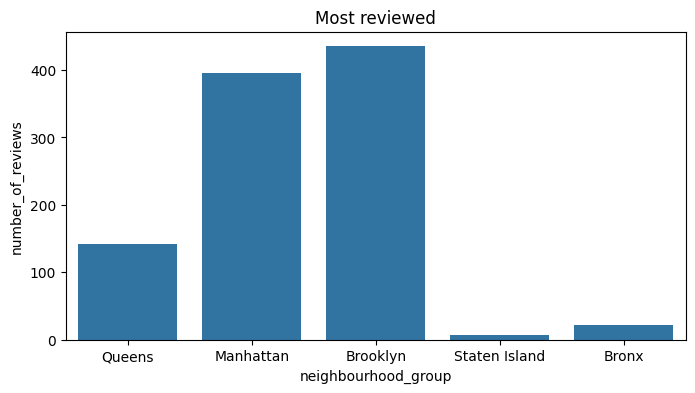

In [419]:
#Visualizing which neighbourhood group have most reviewed AirBnbs by taking top 1000 most reviewed dataset


most_reviewed_airbnb = data.nlargest(1000, ['number_of_reviews']) 


dataf = most_reviewed_airbnb.groupby(['neighbourhood_group'], as_index=False, sort=False)['number_of_reviews'].count()
plt.figure(figsize = (8,4))
plt.title('Most reviewed')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=dataf)
plt.show()


We can see that most reviewed Airbnbs are in Brooklyn Neighbourhood followed by Manhattan and Queens

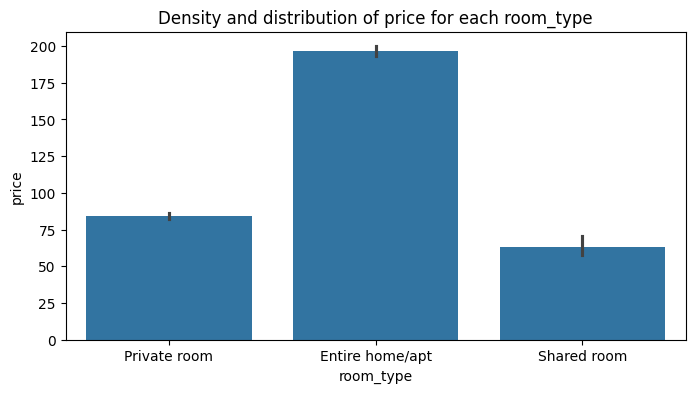

In [423]:
#Similarly Visualizing the Distribution of Price for each "Room Type"

plt.figure(figsize = (8,4))
sns.barplot(x='room_type', y="price", data=data) 
plt.title('Density and distribution of price for each room_type')
plt.show()

From the above it can be seen clearly that price for "Entire home/Apt" is highest and Private rooms and shared rooms are on the cheaper end.

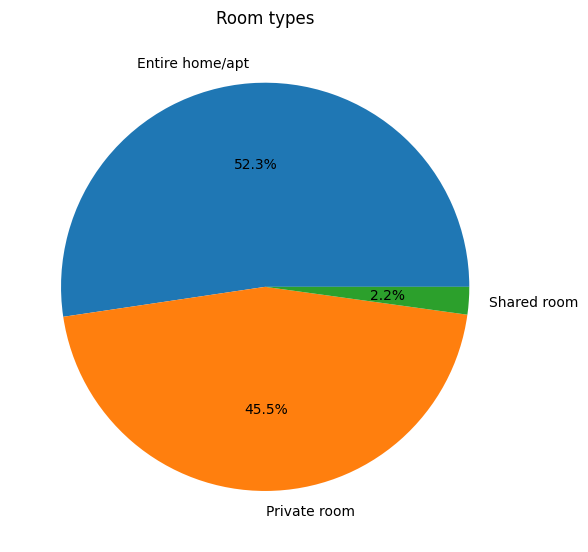

In [314]:
#Visualizing percentage of each room type ex - private, apt etc using Pie Chart

series_data = (data['room_type'].value_counts()/data['room_type'].count())*100
room_type_data = pd.DataFrame({'room_type':series_data.index, 'percentage':series_data.values})

 
#Creating pie Chart

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(room_type_data['percentage'], labels=room_type_data['room_type'], autopct='%.1f%%')
ax.set_title('Room types')
plt.tight_layout()





So we can see from above pie chart that what are the percentages of each type of Airbnbs are there
And can clearly identify that -
1. Most of the AirBnb hosts have either the Entire home/apt or Private room
2. Only 2.2% of AirBnbs are shared room

([<matplotlib.patches.Wedge at 0x4366cd5e0>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Private room'),
  Text(-1.029894329174279e-07, -1.0999999999999954, 'Entire home/apt'),
  Text(1.0994572119784658, -0.03455197575449488, 'Shared room')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(-5.617605431859703e-08, -0.5999999999999974, '48.0%'),
  Text(0.5997039338064358, -0.018846532229724478, '1.0%')])

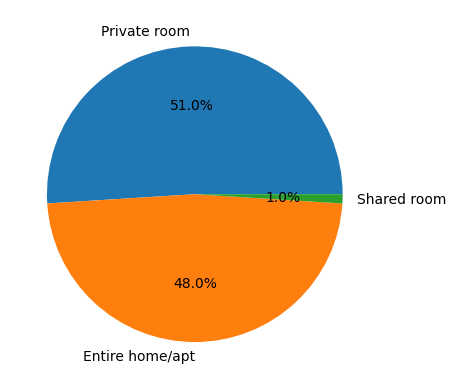

In [431]:
#Visualizing Which type of "Room" is more common in top 10 most reviewed AirBnbs

#we can use most_reviewed_airbnb dataframe for this task

#Creating pie Chart

df = most_reviewed_airbnb.groupby(['room_type'], as_index=False, sort=False)['number_of_reviews'].count()


plt.pie(df['number_of_reviews'], labels=df['room_type'], autopct="%1.1f%%")


From the above pie chart we can see that in the top most reviewed Airbnbs 90% are Private rooms and remaining are entire home/apt. That describes -
1. Most visitors prefers Private room Airbnb (as they're the most reviewed Airbnbs)
2. Visitors don't really like to book shared type of rooms which is obvious as people prefer to have their own personal space.

In [408]:
#Calculating how many Airbnbs are in each of the neighbourhood_group

dataf = data.groupby(['neighbourhood_group'], as_index=False, sort=False)['id'].count()
dataf.head()


,neighbourhood_group,id
0,Brooklyn,16439
1,Manhattan,16621
2,Queens,4572
3,Staten Island,314
4,Bronx,875


we can see from the above data that most of Airbnbs are located in Manhattan NeighbourHood followed by Brooklyn and Queens.

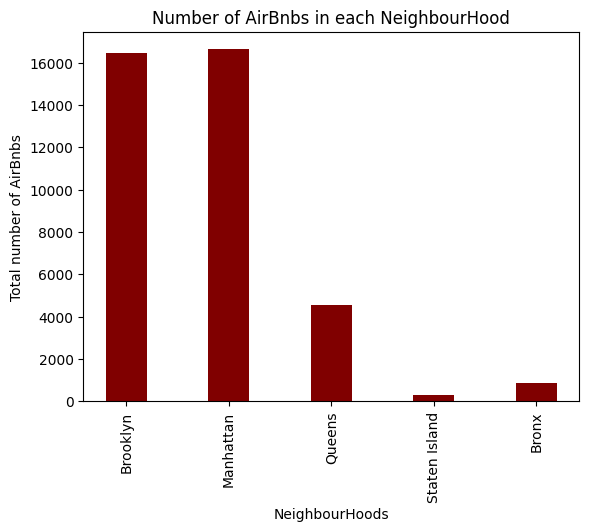

In [409]:
#lets visualize the above data using bar chart

plt.bar(dataf['neighbourhood_group'], dataf['id'],color ='maroon', width = 0.4)
plt.xlabel('NeighbourHoods')
plt.ylabel('Total number of AirBnbs')
plt.title('Number of AirBnbs in each NeighbourHood')
plt.xticks(rotation='vertical')
plt.show()

From the above chart we can see that
1. Most of the airbnbs are located in Manhattan neighbourhood followed by Brooklyn and Queens.
2. Staten island has the lowest amount of airbnbs.

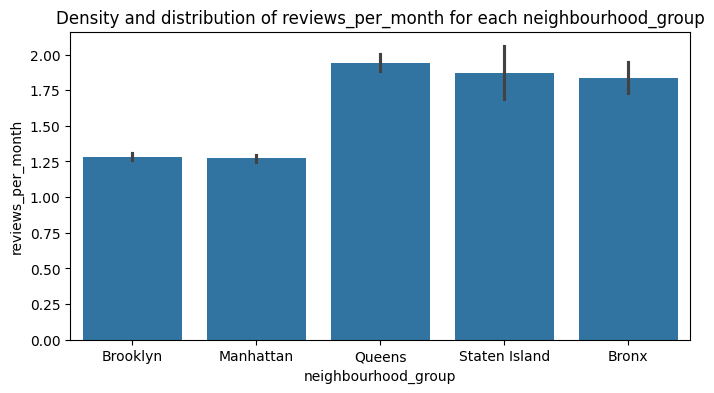

In [410]:
# Visualising distribution of reviews_per_month for each neighberhood_group

plt.figure(figsize = (8,4))
plt.title('Density and distribution of reviews_per_month for each neighbourhood_group')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=data)
plt.show()

from the above chart we can see that -
1. Each bar represents a neighborhood group, and the height of the bar indicates the average number of reviews per month.
2. Queens has higher number of review activity compare to other and standard locations like Brooklyn and Manhattan has similar number of reviews actvity.

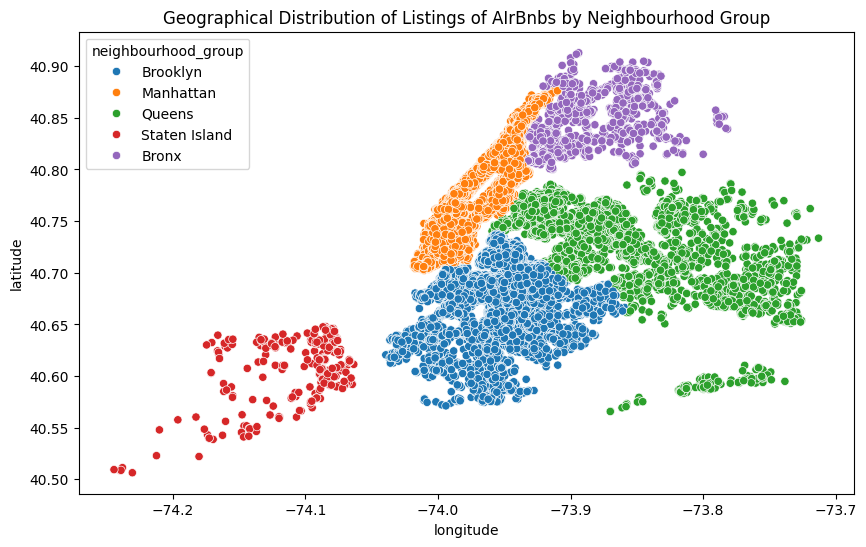

In [411]:
# Visualization of Geographical Distribution of listings.

plt.figure(figsize= (10,6))
plt.title('Geographical Distribution of Listings of AIrBnbs by Neighbourhood Group')

sns.scatterplot(x = data.longitude, y = data.latitude,hue=data.neighbourhood_group)
plt.show()

category             high   low  medium
neighbourhood_group                    
Bronx                   2   712     161
Brooklyn              154  9524    6761
Manhattan             450  5559   10612
Queens                 15  3361    1196
Staten Island           1   232      81


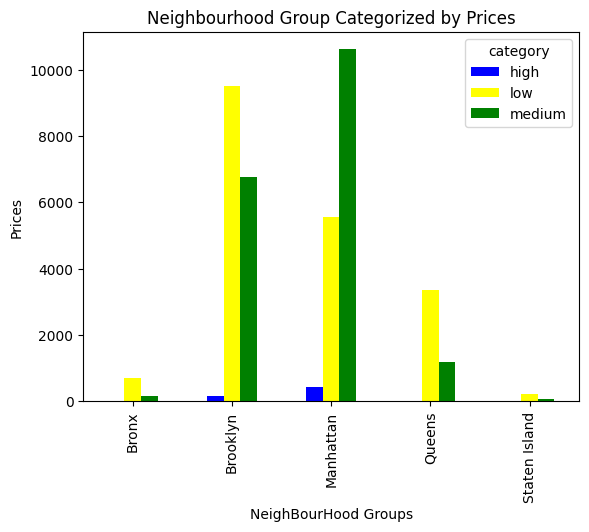

In [424]:
#Creating a filter on price column

def filter(x):
    if x <= 100:
        return 'low'
    if (x > 100 and x <= 500):
        return 'medium'
    if x > 500:
        return 'high'
        

#Applying the above filter function to 'Price' column in our data and storing it into new column 'Category'

data["category"] = data["price"].apply(filter)
data.fillna(0)

#Visualizing the data by grouping category and bar plot using pivot table and aggregate function

print(data.pivot_table(index='neighbourhood_group', columns='category', values='price',fill_value=0, aggfunc='count'))

data.pivot_table(index='neighbourhood_group', columns='category', values='price',fill_value=0, aggfunc='count').plot(kind = 'bar', color = ['Blue', 'yellow', 'green'])
plt.xlabel ('NeighBourHood Groups')
plt.ylabel ('Prices')
plt.title ( 'Neighbourhood Group Categorized by Prices')
plt.show()






From the above chart we can see that 
1. There are very few highly priced (>$500) airbnbs
2. Manhattan have both the highest middle priced (>$100 and <$500) and highly priced(>$500) airbnbs
3. Brooklyn has the most low priced (<$100) airbnbs
4. Bronx and States Island have almost no highly priced airbnbs

Conclusion and Recommendation

From the analysis of data we can say that

1. Most of the AirBnbs are located in two major Neighbourhood groups which are "Manhattan" and "Brooklyn"
2. Most of the Visitors prefer either Private rooms or Entire Apt
3. Very few or almost none of the visitors prefer shared AirBnbs
4. "Entire home/apt" and "Private room" are the popular room types with more than 20000 listings on Airbnb platform.
5. most of listings on the Airbnb is in the range or  0𝑡𝑜 400.
6. 'Entire home/apt" room type is expensive compared to private room and shared room.
7. After deviding the prices into high,medium and low I found out that Manhattan has the highest amount of Airbnbs of highly priced Airbnbs followed by the Brooklyns and Queens.
